In [1]:
# https://pytorch.org/tutorials/beginner/pytorch_with_examples.html

In [2]:
import numpy as np
from numpy import random as rng
import math

from matplotlib import pyplot as plt 

import torch

In [3]:
# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

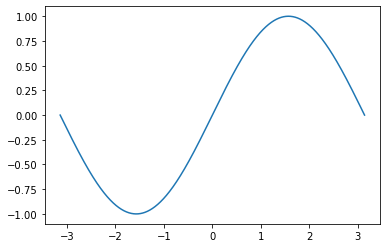

In [4]:
plt.plot(x,y)

$ y = a + b x + c x^2 + d x^3 $

In [5]:
# For this example, the output y is a linear function of (x, x^2, x^3), so
# we can consider it as a linear layer neural network. Let's prepare the
# tensor (x, x^2, x^3).
xx = x.unsqueeze(-1).pow( torch.tensor([1, 2, 3]) )

# In the above code, x.unsqueeze(-1) has shape (2000, 1), and p has shape
# (3,), for this case, broadcasting semantics will apply to obtain a tensor
# of shape (2000, 3) 

xx.shape

torch.Size([2000, 3])

In [6]:
yy = y.unsqueeze(-1)
yy.shape

torch.Size([2000, 1])

----

$$
y = 
a + b x + c x^2 + d x^3 =
\begin{bmatrix} 1 & x & x^2 & x^3 \end{bmatrix} \cdot 
\begin{bmatrix} a \cr b \cr c \cr d \end{bmatrix} 
$$

In [7]:
model = torch.nn.Linear(xx.shape[1], 1)

----

In [8]:
# The nn package also contains definitions of popular loss functions; in this
# case we will use Mean Squared Error (MSE) as our loss function.
loss_fn = torch.nn.MSELoss(reduction='sum')

In [9]:
# Use the optim package to define an Optimizer that will update the weights of
# the model for us. Here we will use RMSprop; the optim package contains many other
# optimization algorithms. The first argument to the RMSprop constructor tells the
# optimizer which Tensors it should update.
learning_rate = 1e-3
optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)

In [10]:
%%time

err_hist = []

for t in range(2000):
    # Forward pass: compute predicted y by passing x to the model.
    y_pred = model(xx)

    # Compute and print loss.
    loss = loss_fn(y_pred, yy)
    err_hist.append(loss.item())  
    
    # if t % 100 == 99:  print(t, loss.item())

    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables it will update (which are the learnable
    # weights of the model). This is because by default, gradients are
    # accumulated in buffers( i.e, not overwritten) whenever .backward()
    # is called. Checkout docs of torch.autograd.backward for more details.
    optimizer.zero_grad()

    # Backward pass: compute gradient of the loss with respect to model parameters
    loss.backward()

    # Calling the step function on an Optimizer makes an update to its parameters
    optimizer.step()

CPU times: user 1.52 s, sys: 8.41 ms, total: 1.53 s
Wall time: 405 ms


In [11]:
# linear_layer = model[0]
# a = linear_layer.bias.item()
# b,c,d = linear_layer.weight[0,:]
# print(f'y = %.4f + %.4f x + %.4f x^2 + %.4f x^3'%( a,b,c,d ))

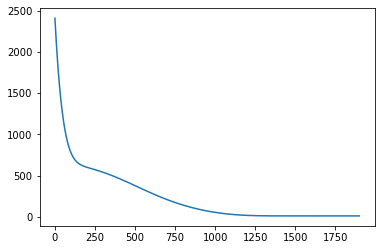

In [12]:
plt.plot(err_hist[100:])

----

In [13]:
with torch.set_grad_enabled(False):
    y_pred = model(xx)

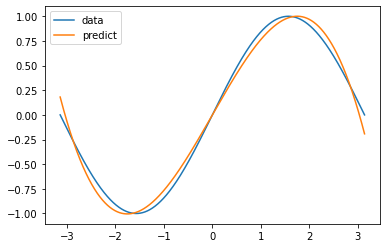

In [14]:
plt.plot(x,y,label='data')
plt.plot(x,y_pred,label='predict')
plt.legend()